In [182]:
import snsql
from snsql import Privacy
import pandas as pd
from pandasql import sqldf
import time



In [137]:
csv_path = 'aac_intakes_outcomes.csv'
meta_path = 'aac_intakes_outcomes.yaml'
dat = pd.read_csv(csv_path)

In [138]:
new_df = dat[['intake_year',
              'age_upon_outcome', 
              'animal_id_outcome',
              'outcome_subtype',
              'outcome_type',
              'sex_upon_outcome',
              'age_upon_outcome_(days)',
              'age_upon_outcome_(years)',
              'outcome_datetime',
              'outcome_weekday',
              'outcome_number',
              'age_upon_intake',
              'animal_id_intake',
              'animal_type',
              'breed',
              'color',
              'found_location',
              'intake_condition',
              'intake_type',
              'sex_upon_intake',
              'age_upon_intake_(days)',
              'age_upon_intake_(years)',
              'intake_datetime',
              'intake_weekday',
              'time_in_shelter_days'
             ]]

In [139]:
new_df = new_df[new_df['animal_type'] == 'Dog']
new_df = new_df[new_df['intake_year'] == 2017]

In [140]:
new_df = new_df.drop(['animal_type', 'intake_year'], axis=1)

In [141]:
new_df

,age_upon_outcome,animal_id_outcome,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),outcome_datetime,outcome_weekday,outcome_number,...,color,found_location,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),age_upon_intake_(years),intake_datetime,intake_weekday,time_in_shelter_days
0,10 years,A006100,NaN,Return to Owner,Neutered Male,3650,10.000000,2017-12-07 14:07:00,Thursday,1.0,...,Yellow/White,Colony Creek And Hunters Trace in Austin (TX),Normal,Stray,Neutered Male,3650,10.000000,2017-12-07 00:00:00,Thursday,0.588194
36,18 years,A251402,NaN,Return to Owner,Spayed Female,6570,18.000000,2017-10-23 11:32:00,Monday,1.0,...,Tan,2905 French Place in Austin (TX),Normal,Stray,Spayed Female,6570,18.000000,2017-10-22 18:41:00,Sunday,0.702083
58,17 years,A285685,NaN,Return to Owner,Neutered Male,6205,17.000000,2017-04-13 11:56:00,Thursday,1.0,...,White/Black,1704 Nelms Dr #1925 in Austin (TX),Normal,Stray,Neutered Male,6205,17.000000,2017-04-12 16:04:00,Wednesday,0.827778
63,15 years,A291843,NaN,Return to Owner,Neutered Male,5475,15.000000,2017-12-12 13:31:00,Tuesday,1.0,...,Brown/Tan,Austin (TX),Normal,Public Assist,Neutered Male,5475,15.000000,2017-12-09 02:11:00,Saturday,3.472222
71,15 years,A297699,NaN,Return to Owner,Neutered Male,5475,15.000000,2017-11-20 15:58:00,Monday,1.0,...,Red Merle,Westgate in Austin (TX),Aged,Stray,Neutered Male,5475,15.000000,2017-11-20 08:11:00,Monday,0.324306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77137,1 year,A764534,NaN,Adoption,Spayed Female,365,1.000000,2018-01-05 16:55:00,Friday,1.0,...,Brown/White,Walnut Drive East And Georgian Drive in Austin...,Normal,Stray,Intact Female,365,1.000000,2017-12-31 16:29:00,Sunday,5.018056
77138,1 year,A764535,Partner,Transfer,Intact Male,365,1.000000,2018-01-04 15:10:00,Thursday,1.0,...,Black,124 West Anderson Lane in Austin (TX),Normal,Stray,Intact Male,365,1.000000,2017-12-31 16:54:00,Sunday,3.927778
77139,2 months,A764536,Foster,Adoption,Spayed Female,60,0.164384,2018-01-25 17:34:00,Thursday,1.0,...,Tan,7Th Street And Chicon in Austin (TX),Normal,Stray,Intact Female,30,0.082192,2017-12-31 17:05:00,Sunday,25.020139
77140,3 months,A764537,Foster,Adoption,Intact Male,90,0.246575,2018-02-13 16:13:00,Tuesday,1.0,...,Brown/White,924 E 51St in Austin (TX),Injured,Stray,Intact Male,30,0.082192,2017-12-31 07:26:00,Sunday,44.365972


In [142]:
privacy = Privacy(epsilon=.0471, delta=0)

In [143]:
meta_path = 'YAMLDataPrivacy.yaml'
reader = snsql.from_df(new_df, privacy=privacy,
metadata=meta_path)
result = reader.execute('SELECT sex_upon_outcome, count(*) FROM MySchema.AnimalShelter group by sex_upon_outcome')


/Users/kelsey/.pyenv/versions/3.10.8/lib/python3.10/site-packages/snsql/sql/private_reader.py:141: UserWarning: The following columns are of type float: age_upon_outcome_(years), outcome_number, age_upon_intake_(years), time_in_shelter_days. 
summary statistics over floats will use Mechanism.laplace, which is not floating-point safe, 
This could lead to privacy leaks.
  warnings.warn(


In [144]:
result

[['sex_upon_outcome', '???'],
 ['Intact Female', 1019],
 ['Intact Male', 1194],
 ['Neutered Male', 3465],
 ['Spayed Female', 3100],
 ['Unknown', 88]]

In [145]:
query = "SELECT sex_upon_outcome, count(*) FROM new_df group by sex_upon_outcome"
df_query = sqldf(query)
df_query

,sex_upon_outcome,count(*)
0,Intact Female,1069
1,Intact Male,1287
2,Neutered Male,3946
3,Spayed Female,3487
4,Unknown,62


In [146]:
query = "SELECT count(*) FROM new_df where animal_id_outcome = 'A006100'"
df_query = sqldf(query)
df_query

,count(*)
0,1


In [165]:
privacy = Privacy(epsilon=.99, delta=0)
meta_path = 'YAMLDataPrivacy.yaml'
reader = snsql.from_df(new_df, privacy=privacy,
metadata=meta_path)
result = reader.execute("SELECT count(*) FROM MySchema.AnimalShelter")



/Users/kelsey/.pyenv/versions/3.10.8/lib/python3.10/site-packages/snsql/sql/private_reader.py:141: UserWarning: The following columns are of type float: age_upon_outcome_(years), outcome_number, age_upon_intake_(years), time_in_shelter_days. 
summary statistics over floats will use Mechanism.laplace, which is not floating-point safe, 
This could lead to privacy leaks.
  warnings.warn(


In [166]:
result

[['???'], [9861]]

In [160]:
query = "select count(*) from (select distinct * from new_df)"
df_query = sqldf(query)
df_query

,count(*)
0,9846


In [150]:
query = "select animal_id_outcome, count(*) from new_df group by 1 having count(*) > 2 "
df_query = sqldf(query)
df_query

,animal_id_outcome,count(*)
0,A524092,3
1,A559953,3
2,A561853,3
3,A615920,5
4,A629344,3
...,...,...
128,A760970,3
129,A761100,3
130,A761107,3
131,A761936,4


In [103]:
query = "select * from new_df where animal_id_outcome = 'A615920' "
df_query = sqldf(query)
df_query

,age_upon_outcome,animal_id_outcome,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),outcome_datetime,outcome_weekday,outcome_number,...,sex_upon_intake,age_upon_intake_(days),age_upon_intake_(years),intake_datetime,intake_weekday,time_in_shelter_days,age_upon_outcome__0_days_1_,age_upon_outcome__0_years_1_,age_upon_intake__0_days_1_,age_upon_intake__0_years_1_
0,7 years,A615920,None,Return to Owner,Spayed Female,2555,7.0,2017-12-06 17:47:00,Wednesday,1.0,...,Spayed Female,2555,7.0,2017-12-04 17:15:00,Monday,2.022222,2555,7.0,2555,7.0
1,7 years,A615920,None,Return to Owner,Spayed Female,2555,7.0,2017-12-01 16:32:00,Friday,2.0,...,Spayed Female,2555,7.0,2017-11-28 11:31:00,Tuesday,3.209028,2555,7.0,2555,7.0
2,6 years,A615920,None,Return to Owner,Spayed Female,2190,6.0,2017-05-12 15:13:00,Friday,3.0,...,Spayed Female,2190,6.0,2017-05-12 13:47:00,Friday,0.059722,2190,6.0,2190,6.0
3,6 years,A615920,None,Return to Owner,Spayed Female,2190,6.0,2017-04-04 10:05:00,Tuesday,4.0,...,Spayed Female,2190,6.0,2017-04-03 17:00:00,Monday,0.711806,2190,6.0,2190,6.0
4,6 years,A615920,Partner,Transfer,Spayed Female,2190,6.0,2017-01-24 13:21:00,Tuesday,5.0,...,Spayed Female,2190,6.0,2017-01-23 13:05:00,Monday,1.011111,2190,6.0,2190,6.0


In [173]:
query = "select animal_id_outcome, count(*) from new_df group by 1 having count(*) > 2 order by 2 DESC "
df_query = sqldf(query)
df_query

,animal_id_outcome,count(*)
0,A738324,6
1,A741582,5
2,A735601,5
3,A721033,5
4,A665334,5
...,...,...
128,A633994,3
129,A629344,3
130,A561853,3
131,A559953,3


In [179]:
query = "select count(*) from (select distinct * from new_df)"
df_query = sqldf(query)
answer = df_query.iloc[0][0]
answer

9846

In [203]:
def query_calc(epsilons, query ):

    errors_list = []
    times_list = []
    values_list = []


    epsilons = epsilons
    for eps in epsilons:
        errors = []
        times = []
        values = []


        privacy = Privacy(epsilon=eps, delta=0)
        meta_path = 'YAMLDataPrivacy.yaml'
        reader = snsql.from_df(new_df, privacy=privacy,
        metadata=meta_path)

        for i in range(10):

            t0 = time.time()
            result = reader.execute(query)
            t1 = time.time()

            result = result[1][0]

            values.append(result)
            times.append(t1-t0)
            errors.append(100 * (result - answer) / answer)

        errors_list.append(errors)
        times_list.append(times)
        values_list.append(values)


    return errors_list, times_list


In [204]:
errors_list, times_list = query_calc(epsilons = [.005, .01, .015, .02, .025] , query = "SELECT count(*) FROM MySchema.AnimalShelter" )

/Users/kelsey/.pyenv/versions/3.10.8/lib/python3.10/site-packages/snsql/sql/private_reader.py:141: UserWarning: The following columns are of type float: age_upon_outcome_(years), outcome_number, age_upon_intake_(years), time_in_shelter_days. 
summary statistics over floats will use Mechanism.laplace, which is not floating-point safe, 
This could lead to privacy leaks.
  warnings.warn(
/Users/kelsey/.pyenv/versions/3.10.8/lib/python3.10/site-packages/snsql/sql/private_reader.py:141: UserWarning: The following columns are of type float: age_upon_outcome_(years), outcome_number, age_upon_intake_(years), time_in_shelter_days. 
summary statistics over floats will use Mechanism.laplace, which is not floating-point safe, 
This could lead to privacy leaks.
  warnings.warn(
/Users/kelsey/.pyenv/versions/3.10.8/lib/python3.10/site-packages/snsql/sql/private_reader.py:141: UserWarning: The following columns are of type float: age_upon_outcome_(years), outcome_number, age_upon_intake_(years), time

Text(0.5, 0, 'epsilon')

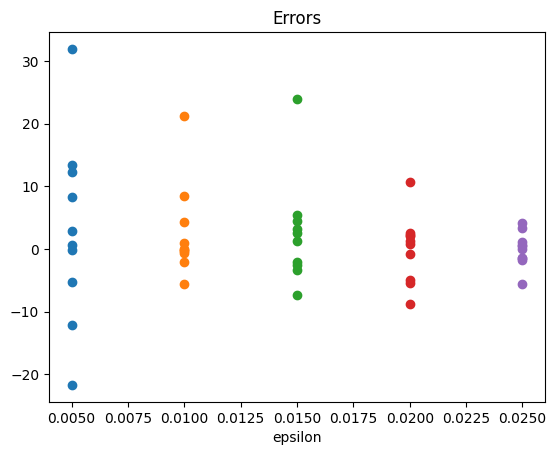

In [214]:
import matplotlib.pyplot as plt
import numpy as np


for xe, ye in zip(epsilons, errors_list):
    plt.scatter([xe] * len(ye), ye)
plt.title('Errors')
plt.xlabel('epsilon')

Text(0.5, 0, 'epsilon')

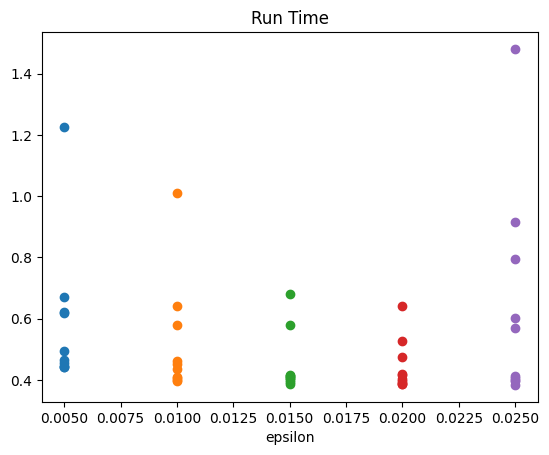

In [213]:
for xe, ye in zip(epsilons, times_list ):
    plt.scatter([xe] * len(ye), ye)
plt.title('Run Time')
plt.xlabel('epsilon')